# Newton Abbot Coding Club
## An Introduction to Forecasting using Python

### Dull stuff first!
*This initial section is a basic primer to help manage time series data structures in Python*

Before we can produce forecasts we need to learn how to manipulate and manage dates in Python's NumPy and Pandas libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates

import seaborn as sns  #seaborn is a nice plotting library that sits on top of matplotlib
sns.set()

## A quick refresher on NumPy Arrays.

NumPy is a high performance library for scientific computing in Python.  It provides the fundermental building block of the SciPy library `numpy.ndarray`

You may be familar with Python Lists. Creation and accessing individual array elements and slicing array is very similar to a list. A big difference is that a `numpy.ndarray` requires all data values to be of the **same type**.

Suppose that we want a numpy array containing the integers 4, 3, 1, 5 and 6.
(Note: a 1D array is referred to as a vector)

A simple way to create such an array and access its data is to use the following syntax.

In [2]:
arr = np.array([4, 3, 1, 5, 6])

print(f'the array contains {arr}')
print(f'a numpy array has has type {type(arr)}')
print(f'the array has a shape of {arr.shape}')
print(f'the array has a length of {len(arr)}')

the array contains [4 3 1 5 6]
a numpy array has has type <class 'numpy.ndarray'>
the array has a shape of (5,)
the array has a length of 5


#### NumPy arrays are zeroed indexed

In [3]:
print(f'The item at index 0 in the array is {arr[0]}')
print(f'The item at index 2 in the array is {arr[2]}')

The item at index 0 in the array is 4
The item at index 2 in the array is 1


#### NumPy array slicing

`[start:end]` where start is inclusive and end is exclusive

In [4]:
print(f'The first two elements in the array are {arr[:2]}')
print(f'If we want the last two items in the array we can  {arr[3:]}')
print(f'Or we can can use negative slice notation {arr[-2:]}')

The first two elements in the array are [4 3]
If we want the last two items in the array we can  [5 6]
Or we can can use negative slice notation [5 6]


## Datetimes in NumPy

If not done correctly, dates and times can be painful to use in coding!

NumPy's data type to manage datetimes is called `datetime64`. 

### Static arrays of `datetime64`

In [5]:
np.array(['2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14'], dtype='datetime64')

array(['2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14'],
      dtype='datetime64[D]')

Notice that the np.array has dtype='datetime64[D]'.  The 'D' standard for the minimum unit of days
Consider an alternative where we include hours.  You need to include the letter 'T' (for timestamp) in string pass to the numpy.array

In [6]:
np.array(['2019-07-11T06', '2019-07-12T12', '2019-07-13T01', '2019-07-14T17'], 
         dtype='datetime64')

array(['2019-07-11T06', '2019-07-12T12', '2019-07-13T01', '2019-07-14T17'],
      dtype='datetime64[h]')

That time the dtype='datetime64[h]' where 'h' stands for hours.  We can go further and try minutes.

In [7]:
np.array(['2019-07-11T00:13', '2019-07-12T00:15', '2019-07-13T00:15', '2019-07-14T00:05'], 
         dtype='datetime64')

array(['2019-07-11T00:13', '2019-07-12T00:15', '2019-07-13T00:15',
       '2019-07-14T00:05'], dtype='datetime64[m]')

And now try seconds

In [8]:
np.array(['2019-07-11T00:13:59', '2019-07-12T00:15:30', '2019-07-13T00:15:20', '2019-07-14T00:05:15'], 
         dtype='datetime64')

array(['2019-07-11T00:13:59', '2019-07-12T00:15:30',
       '2019-07-13T00:15:20', '2019-07-14T00:05:15'],
      dtype='datetime64[s]')

and miliseconds

In [9]:
np.array(['2019-07-11T00:13:59.100', '2019-07-12T00:15:30.189'], 
         dtype='datetime64')

array(['2019-07-11T00:13:59.100', '2019-07-12T00:15:30.189'],
      dtype='datetime64[ms]')

### Quick creation of date arrays using `np.arange`

`np.arange(start,stop,step)` (where stop is *exclusive*) is commonly used to produce an np.array of integers can be used to produce an array of evenly-spaced integers (particularly good for generating synthetic testing data).  

`np.arange` can also be used to generate a range of date time stamps.

*Try changing the step argument to a different value*

In [10]:
np.arange('2019-07-01', '2019-07-31', step=7, dtype='datetime64[D]')

array(['2019-07-01', '2019-07-08', '2019-07-15', '2019-07-22',
       '2019-07-29'], dtype='datetime64[D]')

In [11]:
np.arange('2019-07-01', '2019-07-31', step=7, dtype='datetime64[m]')

array(['2019-07-01T00:00', '2019-07-01T00:07', '2019-07-01T00:14', ...,
       '2019-07-30T23:43', '2019-07-30T23:50', '2019-07-30T23:57'],
      dtype='datetime64[m]')

To get all values in between two dates then *omit* the step argument.  The below generates days between 1st and 10th August

In [12]:
np.arange('2019-07-01', '2019-07-10', dtype='datetime64[D]')

array(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
       '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
       '2019-07-09'], dtype='datetime64[D]')

## Date Time Index in Python

pandas `datetimeindex` builds on numpy datetime64 data type.  Pandas is definitely the easiest way to work with time series data in Python.  One of the reasons for this is that pandas can detect and handle different formats of date strings in input files.  Always watch out for problems with US -> UK dates and vice versa.

### Static creation

If you need to create some synthetic data for testing then you can use the `pandas.date_range` function.

In [13]:
index = pd.date_range('1/1/2019', periods=7, freq='D')
index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07'],
              dtype='datetime64[ns]', freq='D')

* A hourly date range

In [14]:
index = pd.date_range('1/1/2019', periods=7, freq='h')
index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

* A 'monthly start' range.

In [15]:
index = pd.date_range('1/1/2019', periods=7, freq='MS')
index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', freq='MS')

**Convert numpy array to datetime index**

For data manipulation and analysis I often find myself moving between NumPy arrays and pandas DataFrames. 

In [16]:
arr_dates = np.array(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64')
index = pd.DatetimeIndex(arr_dates)
index

DatetimeIndex(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64[ns]', freq=None)

Note that in the example above the frequency is **None**.  That's annoying and there are some forecasting tools in Python that will insist on having a frequency.  There are two ways to sort this out.

In [17]:
#pass in the frequency argument
arr_dates = np.array(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64')
index = pd.DatetimeIndex(arr_dates, freq='D')
index

DatetimeIndex(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64[ns]', freq='D')

In [18]:
#set the frequency post-hoc
arr_dates = np.array(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64')
index = pd.DatetimeIndex(arr_dates)
index.freq = 'D'
index

DatetimeIndex(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64[ns]', freq='D')

**Finding the min|max andin a date time index and accessing a TimeStamp**

In [19]:
index.min()

Timestamp('2019-07-11 00:00:00')

In [20]:
index.max()

Timestamp('2019-07-13 00:00:00')

In [21]:
print(index.min().year)
print(index.min().month)
print(index.min().day)

2019
7
11


## Importing data from a CSV file

First create a synthetic data set and save to csv

In [22]:
LAMBDA = 30
PERIODS = 365 * 2

idx = pd.date_range('1/1/2018', periods=PERIODS, freq='D')

# representing a count variable of sales og widgets with mean LAMBDA.
sales = np.random.poisson(LAMBDA, size=PERIODS) 
df = pd.DataFrame(sales, index=idx)
df.columns = ['sales']
df.index.name = 'date'
df.head()


,sales
date,
2018-01-01,30
2018-01-02,41
2018-01-03,31
2018-01-04,32
2018-01-05,30


In [23]:
df.to_csv('data/example_data1.csv') # save to file

Now read in the data and let pandas know that the index is a date field using the `parse_dates` argument.

In [24]:
df = pd.read_csv('data/example_data1.csv', index_col='date', parse_dates=True)
#you have to set this manually
df.index.freq='D'

In [25]:
df.head()

,sales
date,
2018-01-01,30
2018-01-02,41
2018-01-03,31
2018-01-04,32
2018-01-05,30


In [26]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq='D')

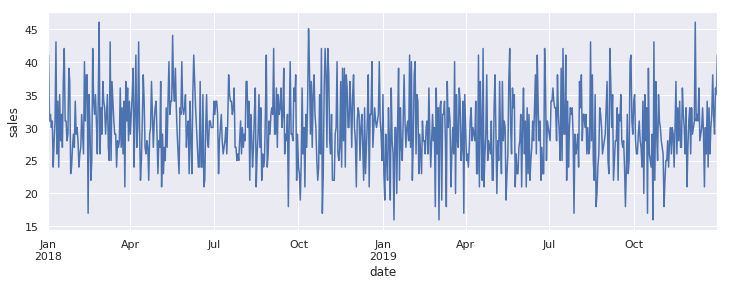

In [27]:
ax = df['sales'].plot(figsize=(12,4))
ax.set(xlabel='date', ylabel='sales');


**Limit to specific time ranges**

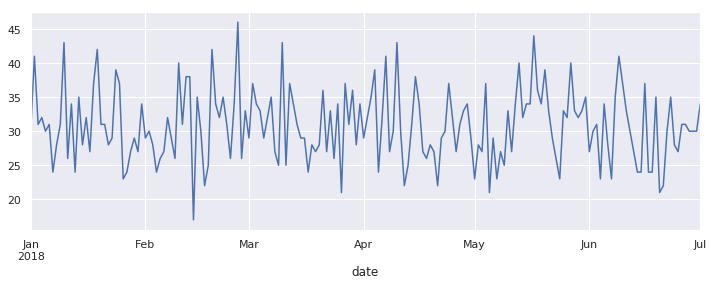

In [28]:
#e.g. first 6 months of 2018 - just use slicing
df['sales']['2018-01-01':'2018-07-01'].plot(figsize=(12,4));

### Easy ways to get access to specific types of dates

A simple way to do this is using the resample function.

In [29]:
df.resample(rule='A').mean() # year end frequency (Should be 30ish!)

,sales
date,
2018-12-31,30.553425
2019-12-31,29.282192


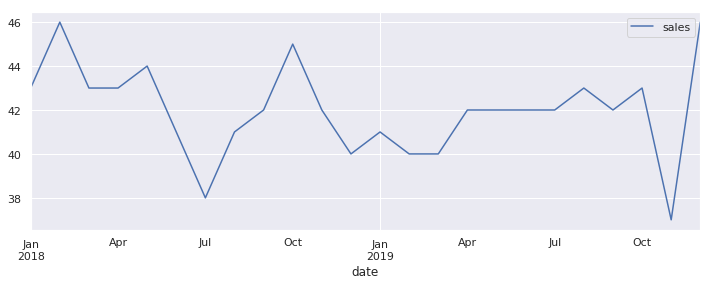

In [30]:
df.resample(rule='M').max().plot.line(figsize=(12,4)) # month end maximum sales

## Time Series Forecasting

We are going to work with a famous time series dataset: monthly airline passengers between 1949 and 1960.  Its a cool data set that is useful for learning how to use forecasting tools.  

Our workflow will be:

* Load the dataset and setup a datetimeindex
* Split the dataset into train and test series
* Perform a seasonal decomposition
* Build a simple baseline forecast
* Build a seasonal ARIMA model
* Measure the point forecast accuracy of the baseline and ARIMA model
* Conduct time series cross validation
* Fit prediction intervals to the model.

### Loading the dataset

The data set is conveniently part of a library called `pmdarima` which bundles a group classes for 
ARIMA modelling and some test datasets.*

In [31]:
#!pip install pmdarima
import pmdarima as pmd
pmd.__version__  #should be version 1.5.2

'1.5.2'

In [32]:
from pmdarima.datasets import load_airpassengers, load_lynx

In [34]:
START_DATE = '1949-01-01'
df_airline = load_airpassengers(as_series=True)

#there's no datetimeindex from the bundled dataset. So let's add one.
df_airline.index= pd.date_range(START_DATE, periods=len(df_airline), freq='MS')


In [35]:
len(df_airline)

144

In [36]:
df_airline.index.max()

Timestamp('1960-12-01 00:00:00')

## Train, Test Split.  A.K.A. DON'T PLOT IT YET 

We need to hold back some of our data.  This is so we can simulate forecasting conditions and check a models accuracy on unseen data.  We don't want to know what it looks like as that will introduce bias into the forecasting process and mean we overfit our model to the data we hold.

**Remember - there is no such thing as real time data from the future!**

In [37]:
def ts_train_test_split(data, split_date):
    '''
    Split time series into training and test data
    
    Parameters:
    -------
    data - pd.DataFrame - time series data.  Index expected as datatimeindex
    split_date - the date on which to split the time series
    
    Returns:
    --------
    tuple (len=2) 
    0. pandas.DataFrame - training dataset
    1. pandas.DataFrame - test dataset
    '''
    train = data.loc[data.index < split_date]
    test = data.loc[data.index >= split_date]
    return train, test

In [38]:
#hold back the last twelve months
train, test = ts_train_test_split(df_airline, '1960-01-01')

In [39]:
len(train)

132

In [40]:
#quick check that we have held back 12 months
len(test)

12

## Plotting the training data

Now that we have held back a 'test' set we can safely plot at the airline passengers without introducing bias. 

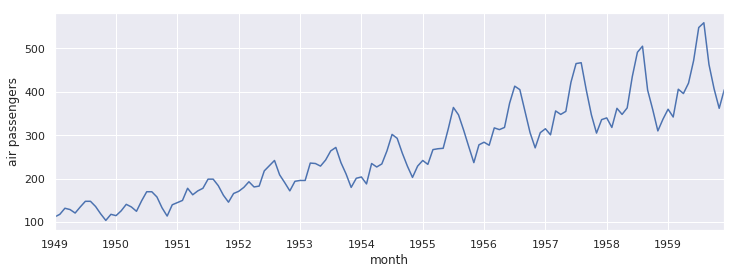

In [41]:
ax = train.plot(figsize=(12,4))
ax.set(xlabel='month', ylabel='air passengers');

## Seasonal decomposition

Before performing a forecast it is worth decomposing the time series into its components of trend, seasonality and noise.

* statsmodels has function called `seasonal_decompose()` for this task

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
sd_result = seasonal_decompose(train, model='multiplicative')

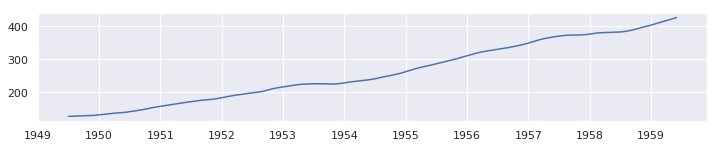

In [44]:
ax = sd_result.trend.plot(figsize=(12,2))

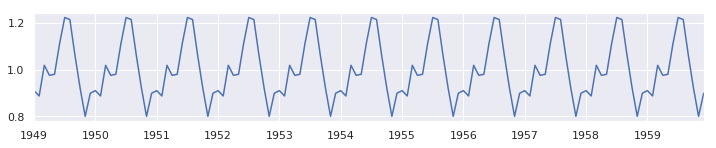

In [45]:
ax = sd_result.seasonal.plot(figsize=(12,2))

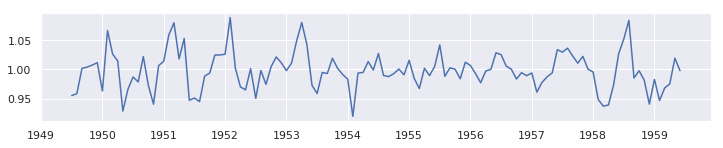

In [46]:
ax = sd_result.resid.plot(figsize=(12,2))

### A simple forecasting baseline.

Before employing any complex forecasting approach we are going to use a simple model to create a baseline.  Complex models need to be 'more accurate' than the simple baseline otherwise we throw them out!  We will define how we measure accuracy shortly.

Given the strong seasonal component that was confirmed by the seasonal decomposition we are going to use a **seasonal naive** forecasting method.  This is part of the 'carry forward previous values' family of *naive* forecasting methods.  In general, if we have data with period $k$ are at time $t$ and we are predicting time $Y_{t+1}$ then we simply carry forward the value from $Y_{t+1-k}$

For example:

In [47]:
OBS = 24
y_obs = np.arange(1, OBS+1)
y_obs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [48]:
#assume data is monthly and produce a forecast
PERIOD = 12
y_pred = y_obs[len(y_obs)+1-PERIOD]
y_pred

14

In [77]:
from forecast.baseline import Naive1, SNaive, Drift

In [56]:
HORIZON = 12
PERIOD = 12

In [64]:
snf = SNaive(period=PERIOD)
snf.fit(train)
insample_predictions = snf.fittedvalues

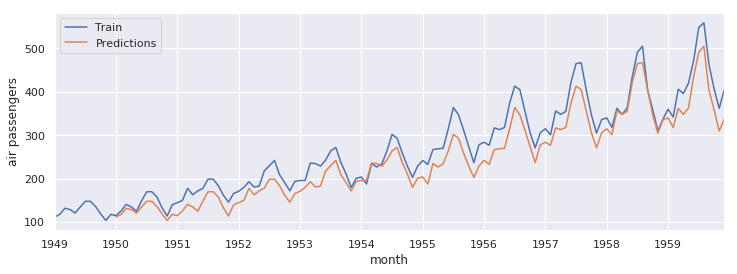

In [74]:
ax = train.plot(figsize=(12,4))
insample_predictions.plot(ax=ax)
ax.set(xlabel='month', ylabel='air passengers');
ax.legend(['Train', 'Predictions'])

### In-Sample Diagnostics

To have a look at the in-sample diagnostics take alook at the model **residuals** (difference between the actual value and the prediction)

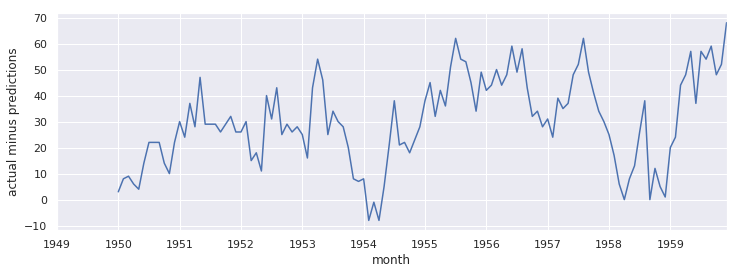

In [73]:
ax = snf.resid.plot(figsize=(12,4))
ax.set(xlabel='month', ylabel='actual minus predictions');

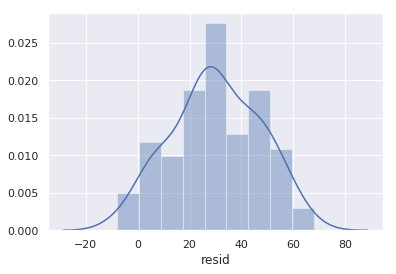

In [84]:
sns.distplot(snf.resid.dropna())

### Measuring the size of the in-sample model error

There are many ways to quantify the size of the residuals. Each has its own pro's and con's. One problem is that forecast errors can be both positive and negative and that can mask the true size of the deviations. A simple way to remedy this is to use Mean Absolute Deviation or Mean Squared Error.  There's a bit of debate about if you should take the median value or the mean, but here we will just use the median.

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
#remember that SNAIVE doesn't fit anything to the first PERIOD data points
mean_squared_error(y_true=train[PERIOD:], y_pred=insample_predictions[PERIOD:])

1193.5833333333333

In [92]:
mean_absolute_error(y_true=train[PERIOD:], y_pred=insample_predictions[PERIOD:])

30.45

Mean absolute error is conceptually a easier to understand model.  The dimensions of MSE are airpassengers squared!  Which is odd!  One way to remedy this units issue is the **Root Mean Squared Error (RMSE)**

RMSE = $\sqrt{mean(e_t^2)}$ where $e_t$ is the error in predicting $y_t$.

In [93]:
from statsmodels.tools.eval_measures import rmse

In [94]:
rmse(x1=train[PERIOD:], x2=insample_predictions[PERIOD:])

34.548275403170756

In [96]:
#another way!
np.sqrt(mean_squared_error(y_true=train[PERIOD:], y_pred=insample_predictions[PERIOD:]))

34.548275403170756

RMSE and MAE are called 'scale specific' measures as the units and magnitude are specific to the problem and context.  An alternative approach is to use a scale invariant measure such as the **mean absolute percentage error (MAPE)**

The percentage error is given by $p_t = 100e_t/y_t$ where $e_t$ is the error in predicting $y_t$.  Therefore, MAPE = $mean(|p_t|)$. A limitation of MAPE is that it is inflated when the denominator is small relative to the absolute forecast error (such in the case of outliers or extreme unexpected events). It is also penalises negative errors more than positive errors.  A consequence of this property is that MAPE can lead to selecting a model that tends to under forecast.  The two following examples illustrate the issue. $$APE_{1} = \left| \frac{y_t - \hat{y_t}}{y_t} \right|= \left| \frac{150 - 100}{150} \right| = \frac{50}{150} = 33.33\%$$  

$$APE_{2} = \left| \frac{100 - 150}{100} \right| = \frac{50}{100} = 50\%$$

In [97]:
def mean_absolute_percentage_error(y_true, y_pred): 
    '''
    MAPE

    Parameters:
    --------
    y_true -- np.array actual observations from time series
    y_pred -- the predictions to evaluate

    Returns:
    -------
    float, scalar value representing the MAPE (0-100)
    '''
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [101]:
mean_absolute_percentage_error(y_true=train[PERIOD:], y_pred=insample_predictions[PERIOD:])

11.374830613642914

## A second baseline.  Naive Forecast 1

This method is even simpler than Seasonal Naive. It simply carries forward the previous value. 

* **Task**: Have a go at using the `Naive1()` class.  It follows the same pattern as SNaive interface.  Instantiate a class.  call the `.fit(X)` method and then use the `.fittedvalues` and `.resid` properties for diagnostics.  
* Calculate the in-sample MAE, RMSE and MAPE

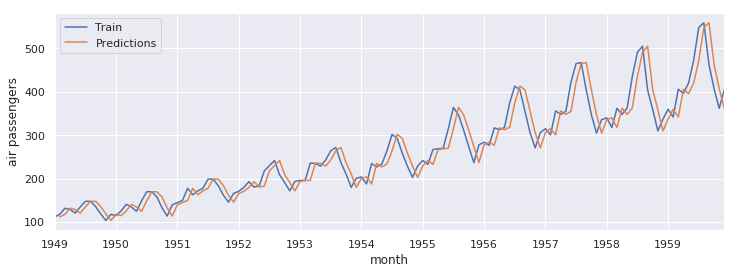

In [107]:
nf1 = Naive1()
nf1.fit(train)
insample_predictions = nf1.fittedvalues

ax = train.plot(figsize=(12,4))
insample_predictions.plot(ax=ax)
ax.set(xlabel='month', ylabel='air passengers');
ax.legend(['Train', 'Predictions'])

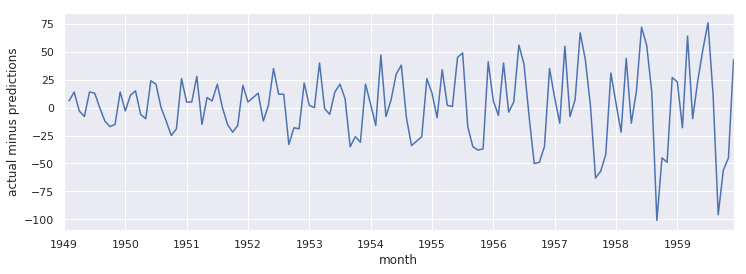

In [109]:
ax = nf1.resid.plot(figsize=(12,4))
ax.set(xlabel='month', ylabel='actual minus predictions');